In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import InputLayer,Dense,Dropout,BatchNormalization,Flatten, Conv2D, MaxPool2D
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from skimage.io import imread,imshow
from skimage.transform import resize
from keras.optimizers import Adam, sgd
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import random_normal, glorot_normal, he_normal
%matplotlib inline

Using TensorFlow backend.


In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data.isnull().sum()

image_names    0
class          0
dtype: int64

In [ ]:
data['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/My\ Drive/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         
  inflating: images/5274.jpg         
  inflating: images/5275.jpg         

In [ ]:
seed =42
rng = np.random.RandomState(seed)

## Readig Data 

In [ ]:
#Load images and store it into numpy array
Images = []

for img_name in data.image_names:
    # loading the image using its name
    img = imread('/content/images/' +img_name)
    # saving each image in the list
    img = resize(img,(64,64),anti_aliasing=True,preserve_range=True).astype('uint8')
    Images.append(img)

#converting list to numpy array
Images = np.array(Images)
#storing target variable seperately
y = data['class'].values

In [ ]:
Images.shape  

(12196, 64, 64, 3)

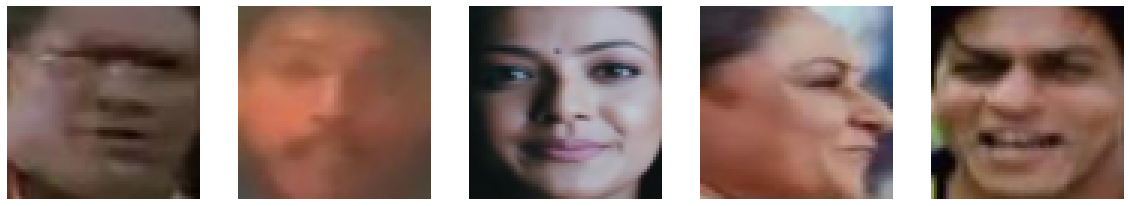

In [ ]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(Images[i])
    ax[i].axis('off')

## Pre-Processing The Data

In [ ]:
Images.min(), Images.max()

(0, 255)

In [ ]:
# # normalizing the pixel values
Images = Images/Images.max()
Images.min(),Images.max()

(0.0, 1.0)

## Splitting The Data

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(Images, y, test_size=0.3)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((8537, 64, 64, 3), (8537,)), ((3659, 64, 64, 3), (3659,)))

## Image Augmentation

In [ ]:
image_augmentation = ImageDataGenerator(rotation_range=30, width_shift_range=20, height_shift_range=20, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

In [ ]:
image_augmentation.fit(X_train)

## Model Building

In [ ]:
#creating sequential model
model = Sequential()

#defining input layer with 3D input of shape(64.64,3)
model.add(InputLayer(input_shape=(64,64,3)))

#defining the first Convolutional layer with 25 filters of size(5,5)
model.add(Conv2D(25,(5,5), activation='relu', strides=(1, 1), padding='valid'))
#defining the second Convolutional layer with 50 filters of size(5,5)
model.add(Conv2D(50,(5,5), activation='relu', strides=(1, 1), padding='valid'))

#Flattening the output from Convolutional layers so that it can be forwarded to the dense layers
model.add(Flatten())

#defining the first dense layers 
model.add(Dense(units=100, activation='sigmoid'))

#defining the output layer
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
#Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 60, 60, 25)        1900      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 50)        31300     
_________________________________________________________________
flatten_3 (Flatten)          (None, 156800)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               15680100  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 15,713,401
Trainable params: 15,713,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = Adam(learning_rate=1e-5,clipvalue=1)
sgd_ = sgd(learning_rate=1e-5,clipvalue=1)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
early_stopping  =  EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, mode='min')

In [ ]:
filepath = "best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=140), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
61/61 [==============================] - 10s 161ms/step - loss: 0.6847 - accuracy: 0.5641 - val_loss: 0.6748 - val_accuracy: 0.6002
Epoch 2/10
61/61 [==============================] - 9s 152ms/step - loss: 0.6773 - accuracy: 0.5844 - val_loss: 0.6674 - val_accuracy: 0.6133
Epoch 3/10
61/61 [==============================] - 9s 152ms/step - loss: 0.6731 - accuracy: 0.5890 - val_loss: 0.6590 - val_accuracy: 0.6245
Epoch 4/10
61/61 [==============================] - 9s 155ms/step - loss: 0.6724 - accuracy: 0.5873 - val_loss: 0.6560 - val_accuracy: 0.6310
Epoch 5/10
61/61 [==============================] - 9s 153ms/step - loss: 0.6695 - accuracy: 0.5935 - val_loss: 0.6531 - val_accuracy: 0.6376
Epoch 6/10
61/61 [==============================] - 9s 152ms/step - loss: 0.6682 - accuracy: 0.6007 - val_loss: 0.6639 - val_accuracy: 0.5947
Epoch 7/10
61/61 [==============================] - 9s 155ms/step - loss: 0.6665 - accuracy: 0.5972 - val_loss: 0.6494 - val_accuracy: 0.6442
Epoch

In [ ]:
def plotFigure(model_history, t_loss, v_loss, model_name):
  plt.plot(model_history.history[t_loss])
  plt.plot(model_history.history[v_loss])
  plt.title(model_name)
  plt.ylabel(t_loss)
  plt.xlabel('epoch')
  plt.legend(['train','validation'], loc='upper left')
  plt.show()

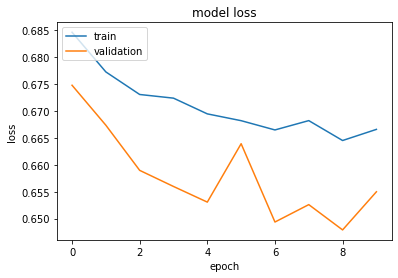

In [ ]:
plotFigure(model_history,'loss','val_loss','model loss')

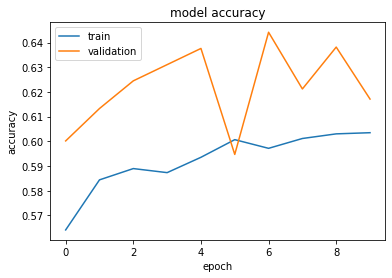

In [ ]:
plotFigure(model_history,'accuracy','val_accuracy','model accuracy')

## Adding MaxPool layer to reduce parameters

In [ ]:
#creating sequential model
model = Sequential()

#defining input layer with 3D input of shape(64.64,3)
model.add(InputLayer(input_shape=(64,64,3)))

#defining the first Convolutional layer with 25 filters of size(5,5)
model.add(Conv2D(25,(5,5), activation='relu', strides=(1, 1), padding='valid'))
#defining the second Convolutional layer with 50 filters of size(5,5)
model.add(Conv2D(50,(5,5), activation='relu', strides=(1, 1), padding='valid'))
#adding maxpool layer after cnn layers
model.add(MaxPool2D(pool_size=(4,4), padding='valid'))

#Flattening the output from Convolutional layers so that it can be forwarded to the dense layers
model.add(Flatten())

#defining the first dense layers 
model.add(Dense(units=100, activation='sigmoid'))

#defining the output layer
model.add(Dense(units=1, activation='sigmoid'))

#compiling the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=140), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
61/61 [==============================] - 10s 159ms/step - loss: 0.7143 - accuracy: 0.4806 - val_loss: 0.6962 - val_accuracy: 0.4572
Epoch 2/10
61/61 [==============================] - 10s 159ms/step - loss: 0.6951 - accuracy: 0.4695 - val_loss: 0.6941 - val_accuracy: 0.4835
Epoch 3/10
61/61 [==============================] - 9s 153ms/step - loss: 0.6937 - accuracy: 0.4892 - val_loss: 0.6924 - val_accuracy: 0.5064
Epoch 4/10
61/61 [==============================] - 9s 149ms/step - loss: 0.6924 - accuracy: 0.5257 - val_loss: 0.6907 - val_accuracy: 0.5840
Epoch 5/10
61/61 [==============================] - 9s 150ms/step - loss: 0.6911 - accuracy: 0.5527 - val_loss: 0.6890 - val_accuracy: 0.6034
Epoch 6/10
61/61 [==============================] - 9s 150ms/step - loss: 0.6898 - accuracy: 0.5734 - val_loss: 0.6872 - val_accuracy: 0.5920
Epoch 7/10
61/61 [==============================] - 9s 151ms/step - loss: 0.6880 - accuracy: 0.5679 - val_loss: 0.6847 - val_accuracy: 0.6078
Epoc

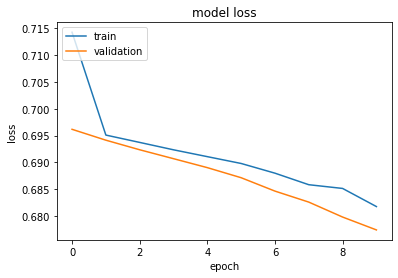

In [ ]:
plotFigure(model_history,'loss','val_loss','model loss')

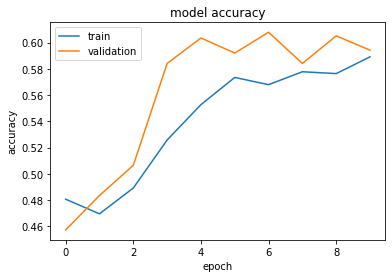

In [ ]:
plotFigure(model_history,'accuracy','val_accuracy','model accuracy')

## Hyperparameter Tuning of Convolutional Neural Networks

### Increase number of Convolutional layers

In [ ]:
#creating sequential model
model = Sequential()

#defining input layer with 3D input of shape(64.64,3)
model.add(InputLayer(input_shape=(64,64,3)))

#defining the first Convolutional layer with 25 filters of size(5,5)
model.add(Conv2D(25,(5,5), activation='relu', strides=(1, 1), padding='valid'))
#defining the second Convolutional layer with 50 filters of size(5,5)
model.add(Conv2D(50,(5,5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50,(5,5), activation='relu', strides=(1, 1), padding='valid'))
#adding maxpool layer after cnn layers
model.add(MaxPool2D(pool_size=(4,4), padding='valid'))

#Flattening the output from Convolutional layers so that it can be forwarded to the dense layers
model.add(Flatten())

#defining the first dense layers 
model.add(Dense(units=100, activation='sigmoid'))

#defining the output layer
model.add(Dense(units=1, activation='sigmoid'))

#compiling the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=140), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
61/61 [==============================] - 11s 173ms/step - loss: 0.7015 - accuracy: 0.5199 - val_loss: 0.6882 - val_accuracy: 0.5808
Epoch 2/10
61/61 [==============================] - 10s 158ms/step - loss: 0.6885 - accuracy: 0.5614 - val_loss: 0.6859 - val_accuracy: 0.5860
Epoch 3/10
61/61 [==============================] - 10s 160ms/step - loss: 0.6855 - accuracy: 0.5769 - val_loss: 0.6837 - val_accuracy: 0.5671
Epoch 4/10
61/61 [==============================] - 10s 158ms/step - loss: 0.6851 - accuracy: 0.5694 - val_loss: 0.6803 - val_accuracy: 0.5917
Epoch 5/10
61/61 [==============================] - 10s 157ms/step - loss: 0.6831 - accuracy: 0.5696 - val_loss: 0.6790 - val_accuracy: 0.5799
Epoch 6/10
61/61 [==============================] - 10s 157ms/step - loss: 0.6818 - accuracy: 0.5720 - val_loss: 0.6755 - val_accuracy: 0.5895
Epoch 7/10
61/61 [==============================] - 10s 158ms/step - loss: 0.6812 - accuracy: 0.5775 - val_loss: 0.6746 - val_accuracy: 0.5909

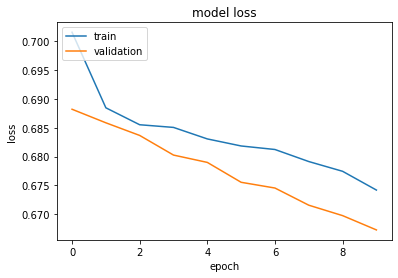

In [ ]:
plotFigure(model_history,'loss','val_loss','model loss')

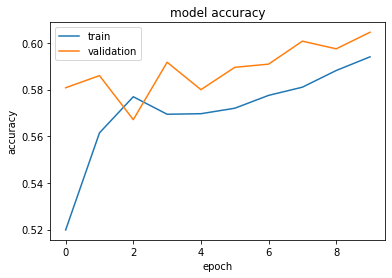

In [ ]:
plotFigure(model_history,'accuracy','val_accuracy','model accuracy')

### increase number of pooling layers

In [ ]:
#creating sequential model
model = Sequential()

#defining input layer with 3D input of shape(64.64,3)
model.add(InputLayer(input_shape=(64,64,3)))

#defining the first Convolutional layer with 25 filters of size(5,5)
model.add(Conv2D(25,(5,5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4,4), padding='valid'))
#defining the second Convolutional layer with 50 filters of size(5,5)
model.add(Conv2D(50,(5,5), activation='relu', strides=(1, 1), padding='valid'))
#adding maxpool layer after cnn layers
model.add(MaxPool2D(pool_size=(4,4), padding='valid'))

#Flattening the output from Convolutional layers so that it can be forwarded to the dense layers
model.add(Flatten())

#defining the first dense layers 
model.add(Dense(units=100, activation='sigmoid'))

#defining the output layer
model.add(Dense(units=1, activation='sigmoid'))

#compiling the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=140), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
61/61 [==============================] - 9s 147ms/step - loss: 0.7248 - accuracy: 0.4928 - val_loss: 0.6942 - val_accuracy: 0.4572
Epoch 2/10
61/61 [==============================] - 9s 140ms/step - loss: 0.6935 - accuracy: 0.4905 - val_loss: 0.6933 - val_accuracy: 0.4870
Epoch 3/10
61/61 [==============================] - 9s 140ms/step - loss: 0.6926 - accuracy: 0.5206 - val_loss: 0.6928 - val_accuracy: 0.5094
Epoch 4/10
61/61 [==============================] - 9s 141ms/step - loss: 0.6921 - accuracy: 0.5304 - val_loss: 0.6922 - val_accuracy: 0.5471
Epoch 5/10
61/61 [==============================] - 9s 140ms/step - loss: 0.6916 - accuracy: 0.5237 - val_loss: 0.6921 - val_accuracy: 0.4988
Epoch 6/10
61/61 [==============================] - 9s 141ms/step - loss: 0.6911 - accuracy: 0.5356 - val_loss: 0.6910 - val_accuracy: 0.5802
Epoch 7/10
61/61 [==============================] - 9s 141ms/step - loss: 0.6907 - accuracy: 0.5460 - val_loss: 0.6906 - val_accuracy: 0.5737
Epoch 

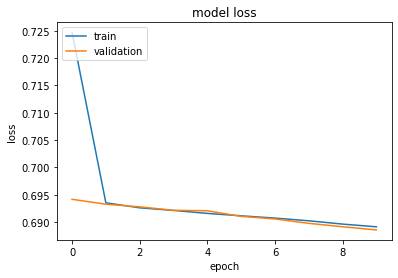

In [ ]:
plotFigure(model_history,'loss','val_loss','model loss')

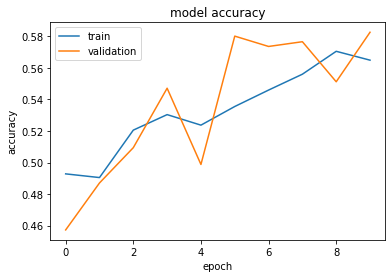

In [ ]:
plotFigure(model_history,'accuracy','val_accuracy','model accuracy')

### Increase number of convolutional filters

In [ ]:
#creating sequential model
model = Sequential()

#defining input layer with 3D input of shape(64.64,3)
model.add(InputLayer(input_shape=(64,64,3)))

#defining the first Convolutional layer with 25 filters of size(5,5)
model.add(Conv2D(50,(5,5), activation='relu', strides=(1, 1), padding='valid'))
#defining the second Convolutional layer with 50 filters of size(5,5)
model.add(Conv2D(75,(5,5), activation='relu', strides=(1, 1), padding='valid'))
#adding maxpool layer after cnn layers
model.add(MaxPool2D(pool_size=(4,4), padding='valid'))

#Flattening the output from Convolutional layers so that it can be forwarded to the dense layers
model.add(Flatten())

#defining the first dense layers 
model.add(Dense(units=100, activation='sigmoid'))

#defining the output layer
model.add(Dense(units=1, activation='sigmoid'))

#compiling the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=140), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
61/61 [==============================] - 11s 184ms/step - loss: 0.6928 - accuracy: 0.5329 - val_loss: 0.6887 - val_accuracy: 0.5594
Epoch 2/10
61/61 [==============================] - 10s 157ms/step - loss: 0.6886 - accuracy: 0.5545 - val_loss: 0.6870 - val_accuracy: 0.5553
Epoch 3/10
61/61 [==============================] - 10s 158ms/step - loss: 0.6867 - accuracy: 0.5630 - val_loss: 0.6853 - val_accuracy: 0.5583
Epoch 4/10
61/61 [==============================] - 10s 157ms/step - loss: 0.6855 - accuracy: 0.5635 - val_loss: 0.6825 - val_accuracy: 0.5756
Epoch 5/10
61/61 [==============================] - 10s 158ms/step - loss: 0.6846 - accuracy: 0.5660 - val_loss: 0.6815 - val_accuracy: 0.5687
Epoch 6/10
61/61 [==============================] - 10s 157ms/step - loss: 0.6826 - accuracy: 0.5692 - val_loss: 0.6784 - val_accuracy: 0.5879
Epoch 7/10
61/61 [==============================] - 10s 157ms/step - loss: 0.6817 - accuracy: 0.5732 - val_loss: 0.6791 - val_accuracy: 0.5668

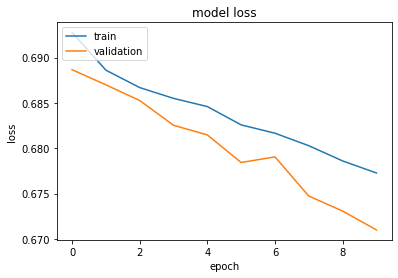

In [ ]:
plotFigure(model_history,'loss','val_loss','model loss')

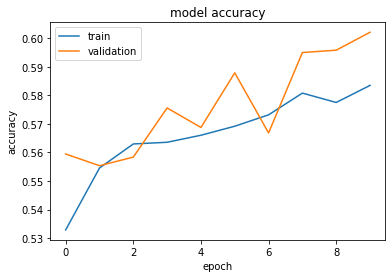

In [ ]:
plotFigure(model_history,'accuracy','val_accuracy','model accuracy')

### Changing size of convolutional filters

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=(64,64,3)))

model.add(Conv2D(25,(3,3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50,(3,3), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4,4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=140), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
61/61 [==============================] - 10s 161ms/step - loss: 0.6975 - accuracy: 0.5194 - val_loss: 0.6915 - val_accuracy: 0.5723
Epoch 2/10
61/61 [==============================] - 9s 149ms/step - loss: 0.6916 - accuracy: 0.5416 - val_loss: 0.6908 - val_accuracy: 0.5783
Epoch 3/10
61/61 [==============================] - 9s 150ms/step - loss: 0.6911 - accuracy: 0.5537 - val_loss: 0.6899 - val_accuracy: 0.5734
Epoch 4/10
61/61 [==============================] - 9s 150ms/step - loss: 0.6904 - accuracy: 0.5484 - val_loss: 0.6892 - val_accuracy: 0.5816
Epoch 5/10
61/61 [==============================] - 9s 149ms/step - loss: 0.6895 - accuracy: 0.5680 - val_loss: 0.6881 - val_accuracy: 0.5761
Epoch 6/10
61/61 [==============================] - 9s 151ms/step - loss: 0.6886 - accuracy: 0.5564 - val_loss: 0.6878 - val_accuracy: 0.5458
Epoch 7/10
61/61 [==============================] - 9s 150ms/step - loss: 0.6882 - accuracy: 0.5601 - val_loss: 0.6859 - val_accuracy: 0.5901
Epoch

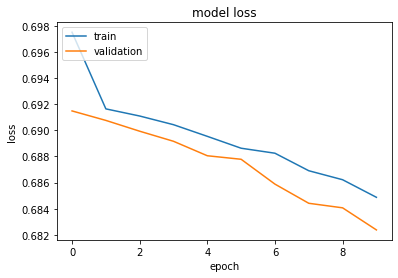

In [ ]:
plotFigure(model_history,'loss','val_loss','model loss')

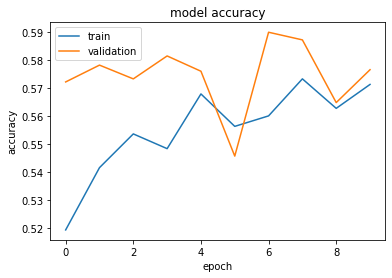

In [ ]:
plotFigure(model_history,'accuracy','val_accuracy','model accuracy')

### Changing Pooling size

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=(64,64,3)))

model.add(Conv2D(25,(5,5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50,(5,5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2,2), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=140), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
61/61 [==============================] - 10s 158ms/step - loss: 0.7016 - accuracy: 0.4833 - val_loss: 0.6954 - val_accuracy: 0.4870
Epoch 2/10
61/61 [==============================] - 9s 151ms/step - loss: 0.6929 - accuracy: 0.5058 - val_loss: 0.6898 - val_accuracy: 0.5174
Epoch 3/10
61/61 [==============================] - 9s 152ms/step - loss: 0.6886 - accuracy: 0.5536 - val_loss: 0.6851 - val_accuracy: 0.6026
Epoch 4/10
61/61 [==============================] - 9s 150ms/step - loss: 0.6846 - accuracy: 0.5844 - val_loss: 0.6797 - val_accuracy: 0.6062
Epoch 5/10
61/61 [==============================] - 9s 151ms/step - loss: 0.6803 - accuracy: 0.5843 - val_loss: 0.6746 - val_accuracy: 0.5988
Epoch 6/10
61/61 [==============================] - 9s 151ms/step - loss: 0.6777 - accuracy: 0.5884 - val_loss: 0.6687 - val_accuracy: 0.6264
Epoch 7/10
61/61 [==============================] - 9s 151ms/step - loss: 0.6740 - accuracy: 0.5907 - val_loss: 0.6659 - val_accuracy: 0.6045
Epoch

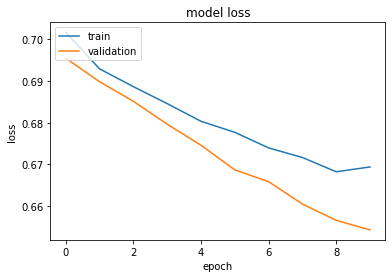

In [ ]:
plotFigure(model_history,'loss','val_loss','model loss')

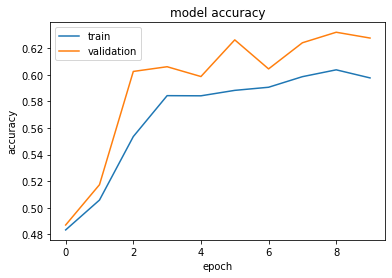

In [ ]:
plotFigure(model_history,'accuracy','val_accuracy','model accuracy')

### Changing padding technique

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=(64,64,3)))

model.add(Conv2D(25,(5,5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(50,(5,5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2,2), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=140), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
61/61 [==============================] - 10s 163ms/step - loss: 0.6985 - accuracy: 0.4784 - val_loss: 0.6941 - val_accuracy: 0.4911
Epoch 2/10
61/61 [==============================] - 9s 155ms/step - loss: 0.6915 - accuracy: 0.5274 - val_loss: 0.6870 - val_accuracy: 0.5638
Epoch 3/10
61/61 [==============================] - 10s 156ms/step - loss: 0.6863 - accuracy: 0.5585 - val_loss: 0.6799 - val_accuracy: 0.6436
Epoch 4/10
61/61 [==============================] - 9s 155ms/step - loss: 0.6824 - accuracy: 0.5839 - val_loss: 0.6746 - val_accuracy: 0.5786
Epoch 5/10
61/61 [==============================] - 9s 155ms/step - loss: 0.6751 - accuracy: 0.5959 - val_loss: 0.6636 - val_accuracy: 0.6433
Epoch 6/10
61/61 [==============================] - 9s 154ms/step - loss: 0.6722 - accuracy: 0.6004 - val_loss: 0.6586 - val_accuracy: 0.6346
Epoch 7/10
61/61 [==============================] - 9s 154ms/step - loss: 0.6692 - accuracy: 0.5974 - val_loss: 0.6565 - val_accuracy: 0.6152
Epoc

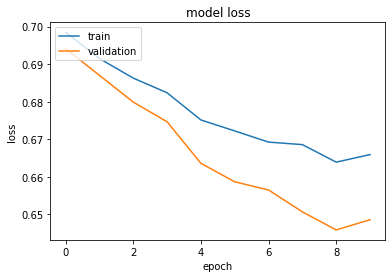

In [ ]:
plotFigure(model_history,'loss','val_loss','model loss')

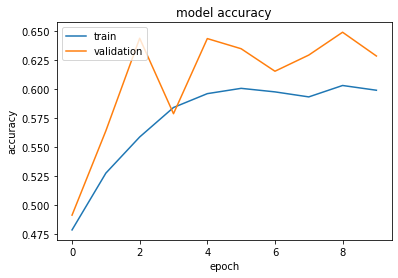

In [ ]:
plotFigure(model_history,'accuracy','val_accuracy','model accuracy')

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=(64,64,3)))

model.add(Conv2D(50,(5,5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(50,(5,5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(50,(5,5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))


#model.add(MaxPool2D(pool_size=(2,2), padding='same'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
# model.add(Dense(units=100, activation='sigmoid'))
# model.add(BatchNormalization())
# model.add(Dropout(rate=0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=140), validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping,checkpoint])

Epoch 1/100
61/61 [==============================] - 13s 213ms/step - loss: 0.6748 - accuracy: 0.5795 - val_loss: 0.7104 - val_accuracy: 0.4898

Epoch 00001: val_accuracy improved from -inf to 0.48975, saving model to best_weights.hdf5
Epoch 2/100
61/61 [==============================] - 12s 200ms/step - loss: 0.6644 - accuracy: 0.6021 - val_loss: 0.7051 - val_accuracy: 0.4898

Epoch 00002: val_accuracy did not improve from 0.48975
Epoch 3/100
61/61 [==============================] - 12s 198ms/step - loss: 0.6594 - accuracy: 0.6118 - val_loss: 0.6929 - val_accuracy: 0.4898

Epoch 00003: val_accuracy did not improve from 0.48975
Epoch 4/100
61/61 [==============================] - 12s 197ms/step - loss: 0.6627 - accuracy: 0.6071 - val_loss: 0.6839 - val_accuracy: 0.5545

Epoch 00004: val_accuracy improved from 0.48975 to 0.55452, saving model to best_weights.hdf5
Epoch 5/100
61/61 [==============================] - 12s 197ms/step - loss: 0.6625 - accuracy: 0.6037 - val_loss: 0.6797 - va

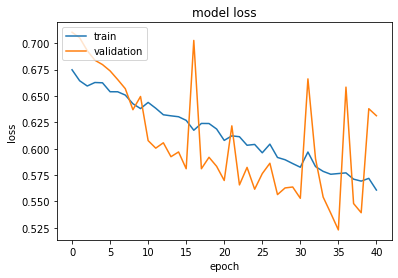

In [ ]:
plotFigure(model_history,'loss','val_loss','model loss')

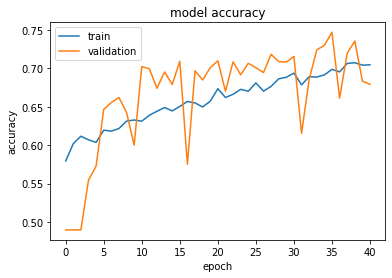

In [ ]:
plotFigure(model_history,'accuracy','val_accuracy','model accuracy')

In [ ]:
model.load_weights("best_weights.hdf5")

In [ ]:
 predictions = model.predict_classes(X_test)[:,0]
 prediction_probabilities = model.predict(X_test)[:,0]

In [ ]:
from sklearn.metrics import accuracy_score
print('Acuuracy = ', accuracy_score(y_test,predictions)*100,'%')

Acuuracy =  74.71986881661657 %


# Transfer Learning

In [ ]:
from keras.models import Model
from keras.utils import to_categorical
from keras.applications.vgg16 import preprocess_input, VGG16

In [ ]:
# #Load images and store it into numpy array
# Images = []

# for img_name in data.image_names:
#     # loading the image using its name
#     img = imread('/content/images/' +img_name)
#     # saving each image in the list
#     Images.append(img)

# #converting list to numpy array
# Images = np.array(Images)
# #storing target variable seperately
# y = data['class'].values


#Load images and store it into numpy array
Images = []

for img_name in data.image_names:
    # loading the image using its name
    img = imread('/content/images/' +img_name)
    # saving each image in the list
    img = resize(img,(64,64),anti_aliasing=True,preserve_range=True).astype('uint8')
    Images.append(img)

#converting list to numpy array
Images = np.array(Images)
#storing target variable seperately
y = data['class'].values

### Pre-Process Data

In [ ]:
#preprocess input images according to requirements of VGG16 model
Images = preprocess_input(Images, mode='tf')
#converting label to categorical
y = to_categorical(y)

In [ ]:
# splitting the dataset        
X_train, X_valid, y_train, y_valid = train_test_split(Images, y, test_size=0.3)

In [ ]:
X_train.shape

(8537, 64, 64, 3)

## Model Development by following architecture of pre-trained model

> Indented block



In [ ]:
base_model = VGG16(weights='imagenet', input_shape=(64,64,3), include_top=False)


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [ ]:
new_layer = Flatten()(base_model.output)
x = Dense(100, activation='relu',name='FC1')(new_layer)
y = Dense(2, activation='softmax',name='prediction')(x)
my_model = Model(input=base_model.input, output=y)
my_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  after removing the cwd from sys.path.


In [ ]:
#compile the model
my_model.compile(optimizer='sgd', metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
filepath = "vgg_best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
model_history = my_model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Train on 8537 samples, validate on 3659 samples
Epoch 1/15
8537/8537 [==============================] - 10s 1ms/step - loss: 0.4804 - accuracy: 0.7568 - val_loss: 0.2461 - val_accuracy: 0.8972

Epoch 00001: val_accuracy improved from -inf to 0.89724, saving model to vgg_best_weights.hdf5
Epoch 2/15
8537/8537 [==============================] - 9s 1ms/step - loss: 0.2314 - accuracy: 0.9048 - val_loss: 0.1773 - val_accuracy: 0.9273

Epoch 00002: val_accuracy improved from 0.89724 to 0.92730, saving model to vgg_best_weights.hdf5
Epoch 3/15
8537/8537 [==============================] - 9s 1ms/step - loss: 0.1399 - accuracy: 0.9421 - val_loss: 0.1185 - val_accuracy: 0.9481

Epoch 00003: val_accuracy improved from 0.92730 to 0.94807, saving model to vgg_best_weights.hdf5
Epoch 4/15
8537/8537 [==============================] - 9s 1ms/step - loss: 0.0926 - accuracy: 0.9657 - val_loss: 0.2902 - val_accuracy: 0.8934

Epoch 00004: val_accuracy did not improve from 0.94807
Epoch 5/15
8537/8537 [===

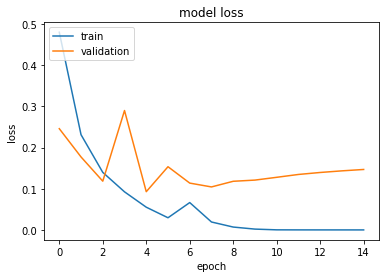

In [ ]:
plotFigure(model_history,'loss','val_loss','model loss')

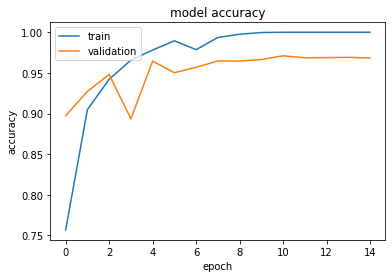

In [ ]:
plotFigure(model_history,'accuracy','val_accuracy','model accuracy')

In [ ]:
my_model.load_weights("vgg_best_weights.hdf5")

In [ ]:
predictions = my_model.predict(X_valid)
predicted_class = np.argmax(predictions,axis=1)
from sklearn.metrics import accuracy_score
print('Acuuracy = ', accuracy_score(y_valid[:,1],predicted_class)*100,'%')

Acuuracy =  97.103033615742 %


### load weights of pre-trained model and freeze few layers

In [ ]:
base_model = VGG16(weights='imagenet', input_shape=(64,64,3), include_top=False)
new_layer = Flatten()(base_model.output)
x = Dense(100, activation='relu',name='FC1')(new_layer)
y = Dense(2, activation='softmax',name='prediction')(x)
my_model = Model(input=base_model.input, output=y)
my_model.summary()


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  """


In [ ]:
len(my_model.layers)

22

In [ ]:
#to set the first 15 layers to non-trainable(weights will not be updated)
for layer in my_model.layers[:15]:
  layer.trainable=False

In [ ]:
#compile the model
my_model.compile(optimizer='sgd', metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
model_history = my_model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Train on 8537 samples, validate on 3659 samples
Epoch 1/15
8537/8537 [==============================] - 6s 653us/step - loss: 0.4724 - accuracy: 0.7657 - val_loss: 0.3365 - val_accuracy: 0.8491
Epoch 2/15
8537/8537 [==============================] - 5s 631us/step - loss: 0.2940 - accuracy: 0.8714 - val_loss: 0.3196 - val_accuracy: 0.8560
Epoch 3/15
8537/8537 [==============================] - 5s 629us/step - loss: 0.2098 - accuracy: 0.9125 - val_loss: 0.2081 - val_accuracy: 0.9125
Epoch 4/15
8537/8537 [==============================] - 5s 633us/step - loss: 0.1451 - accuracy: 0.9431 - val_loss: 0.2769 - val_accuracy: 0.8888
Epoch 5/15
8537/8537 [==============================] - 5s 633us/step - loss: 0.1167 - accuracy: 0.9568 - val_loss: 0.2035 - val_accuracy: 0.9142
Epoch 6/15
8537/8537 [==============================] - 5s 631us/step - loss: 0.0764 - accuracy: 0.9735 - val_loss: 0.2210 - val_accuracy: 0.9186
Epoch 7/15
8537/8537 [==============================] - 5s 631us/step - loss

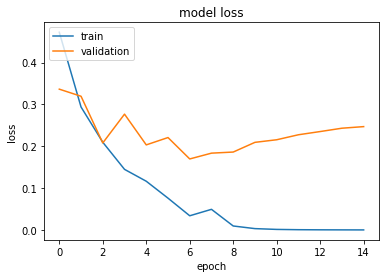

In [ ]:
plotFigure(model_history,'loss','val_loss','model loss')

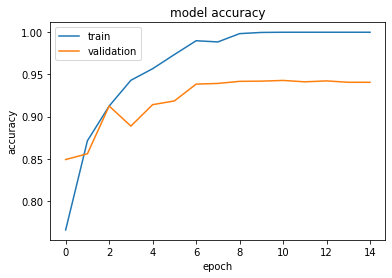

In [ ]:
plotFigure(model_history,'accuracy','val_accuracy','model accuracy')

In [ ]:
predictions = my_model.predict(X_valid)
predicted_class = np.argmax(predictions,axis=1)
from sklearn.metrics import accuracy_score
print('Acuuracy = ', accuracy_score(y_valid[:,1],predicted_class)*100,'%')

Acuuracy =  94.069417873736 %
